# Matplotlib for Publication - Exercises

The point of these exercises is to give you the ability to practice with as many of the plot formats covered in the lectures as possible. You do not have to do all of them, but at least do \#1-1 one so you know how the data are distributed, and then read the remaining prompts and do whichever exercises are relevant to the kinds of data or plot formats you work with.

**Make sure `exoplanets_5250_EarthUnits.csv` is saved to the same working directory as this notebook.**

Here you will play with a cleaned and curated version of a recent release of the NASA exoplanet database, featuring 5250 confirmed exoplanets, that was published on the Kaggle. Some of the units have been changed from the original document so that you can focus on plotting (e.g. most gas giant planets had their masses and radii reported in Jupiter units, but I've converted all planet masses and radii to Earth units).

Here are the column names and descriptions:
- **name**: exoplanet name. The convention is the star's catalog name followed by a lowercase letter, starting with b and progressing alphabetically in order of discovery 
- **distance**: distance to the planetary system in light years
- **star_mag**: apparent brightness of the star as seen from Earth in the astronomical magnitude system (don't worry about this one too much, the units are pretty awful to work with). Higher numbers indicate fainter stars and the system is logarithmic; an *increase* of 5 magnitudes corresponds to a *decrease* in brightness by a factor of 100.
- **planet_type**: values include "Gas Giant" (like Jupiter or Saturn), "Neptune-like" (sort of a mini gas giant or ice giant), "Super Earth" (thought to be rocky but up to a few times larger than Earth), and "Terrestrial" (comparable to or smaller than Earth)
- **discovery_yr**: year that the discovery of the planet was published
- **mass_ME**: mass of the planet in units of Earth masses (1 Earth mass = $5.972 \times 10^{24}$ kg)
- **radius_RE**: radius of the planet in units of Earth masses (1 Earth radius = 6371 km)
- **orbital_radius_AU**: the exoplanet's orbital semi-major axis in units of the average distance between the Earth and Sun (1 Astronomical Unit, or AU)
- **orbital_period_yr**: the time taken for the exoplanet to orbit its star in units of Earth's year
- **eccentricity**: measure of the deviation of the exoplanet's orbit from a perfect circle. Values range from 0 to 1 where 0 = perfect circle and 1 indicates a parabolic (just barely unbound) orbit.
- **detection_method**: principle method used to detect the planet. See [this educational slideshow by NASA](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/) or [this Wikipedia page](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) for more details.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib as mpl

exos = np.genfromtxt('exoplanets_5250_EarthUnits.csv',delimiter=',',dtype=None,
                     names=True, encoding='ascii')

#take a quick peak at the data so we know how to call it
print(exos.dtype.names)
print(exos[np.where(exos['name']=='55 Cancri e')])
print(exos[705])

('name', 'distance', 'star_mag', 'planet_type', 'discovery_yr', 'mass_ME', 'radius_RE', 'orbital_radius_AU', 'orbital_period_yr', 'eccentricity', 'detection_method')
[('55 Cancri e', 41, 5.95084, 'Super Earth', 2004, 7.99, 1.875, 0.01544, 0.0019165, 0.05, 'Radial Velocity')]
('HD 160691 e', 51, 5.12, 'Gas Giant', 2006, 2226., nan, 0.934, 0.84298426, 0.07, 'Radial Velocity')


#### Exercise 1-1.
First, see what you get if you plot the exoplanet mass against the orbital radius as A) a log-log scatter plot with some transparency, and B) as a hexbin plot with logarithmic bins and axes. 

Plot them side-by-side or one atop the other, sharing one axis, and make sure that `figsize` is a good shape to accommodate both plots while keeping them nearly square. Label the axes $a\;[\mathrm{AU}]$ for orbital semi-major axis in AU and $M\;[\mathrm{M}_{\mathrm{E}}]$ for mass in Earth units. For the hexbin plot, just label the colorbar "Counts". Don't worry just yet if one or more axis scales don't show all the decades.

The comments in the code block below provide step-by-step prompts.

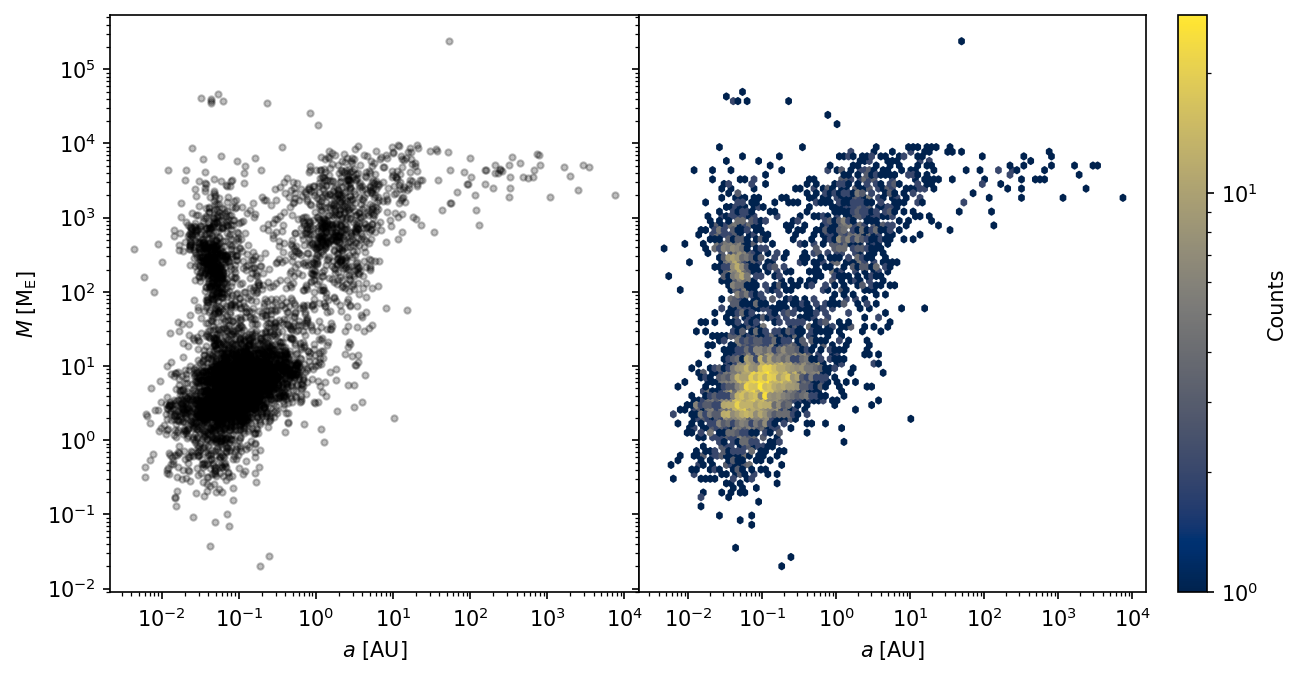

In [75]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi=150, sharey=True, gridspec_kw = {'width_ratios': [1, 1.2]})
fig.subplots_adjust(wspace=0)
ax1.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], 'k.', alpha=0.25)
ax1.set_xlabel(r'$a$ [AU]')
ax1.set_ylabel(r'$M\;[\mathrm{M}_{\mathrm{E}}]$')

hb = ax2.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
               exos['mass_ME'][~np.isnan(exos['mass_ME'])], 
               xscale='log', yscale='log', bins='log',
               cmap = mpl.colormaps['cividis'])
ax2.set_xlabel(r'$a\;[\mathrm{AU}]$')
#ax2.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
fig.colorbar(hb, ax=ax2, label='Counts')

Something to think about: Which plot looks best if you want to emphasize that...
- ...there are apparently 3 main population groups?
- ...the most common type of planet seems to be Super Earths (a few to ~10 times the mass of Earth)?
- ...there is a mass - orbital-radius sensitivity limit that is only broken at large orbital radii, by very large planets that we can directly image? (In other words, if you want the outliers to be prominent.)
    
There are no "wrong" answers, but there are usually better and worse answers.

#### Exercise 1-2.
Let's say you want to see where the Solar System and some other famous multi-planet systems lie on these plots.

Where statements have been used to select the planets in the systems 55 Cancri, TRAPPIST-1, Kepler-90, and HD 40307. Use these and the given `solsys` dictionary variable to plot all of the planets on the figure from Exercise 1, with a distinct marker and color for every planetary system.

Now re-evaluate whether the hexbin or scatter plot is better. (Tip: Try a gray or other muted colormap for the hexbin plot.)

*Expert mode:* if you want an extra challenge, try plotting the included PNG image of Earth at earth's location on the plot using OffsetImage and AnnotationBox from `matplotlib.offsetbox`, and `plt.imread()`. Make sure it's recognizable, but doesn't totally cover Venus or too much of the exoplanet data.

In [74]:
solsys = {'name': np.array(['Mercury','Venus','Earth','Mars',
                            'Jupiter','Saturn','Uranus','Neptune','Pluto']),
         'planet_type': np.array(['Terrestrial','Terrestrial','Terrestrial','Terrestrial',
                                  'Gas Giant','Gas Giant','Neptune-like','Neptune-like', 'Ice Dwarf']), 
         'mass_ME': np.array([0.0553,0.815,1.0,0.107,
                              317.8,95.2,14.5,17.1, 0.0022]), 
         'radius_RE': np.array([0.383,0.949,1.0,0.532,
                                11.21,9.45,4.01,3.88, 0.187]),
         'orbital_radius_AU': np.array([0.387,0.723,1.0,1.52,
                                        5.20,9.57,19.17,30.18, 39.48]),
         'orbital_period_yr': np.array([0.241,0.615,1.0,1.88,
                                        11.9,29.4,83.7,163.7, 247.9]),
         'eccentricity': np.array([0.206,0.007,0.017,0.094,
                                   0.049,0.052,0.047,0.010, 0.244])}

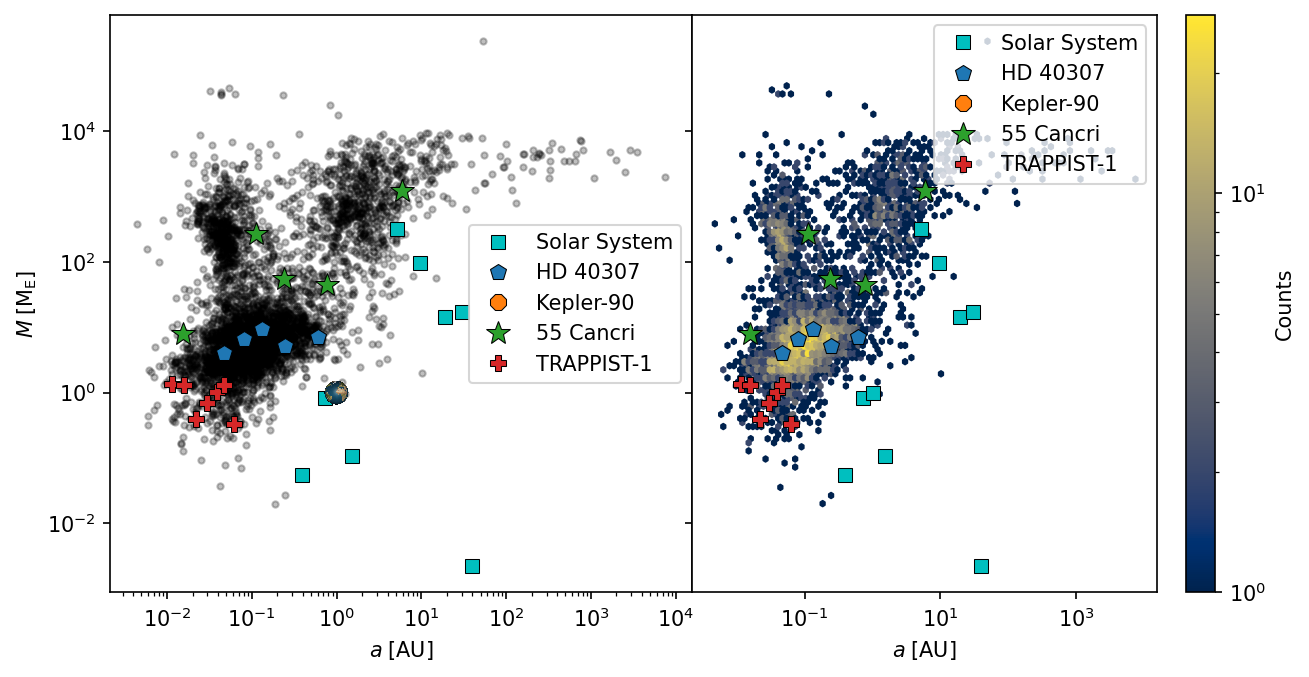

In [5]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi=150, sharey=True)
                            # gridspec_kw = {'width_ratios': [1, 1.2]})
fig.subplots_adjust(wspace=0)
ax1.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], 'k.', alpha=0.25)
ax1.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax1.set_ylabel(r'$M\;[\mathrm{M}_{\mathrm{E}}]$')

import matplotlib as mpl
hb = ax2.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
                exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log',
                bins='log',cmap = mpl.colormaps['cividis'])
ax2.set_xlabel(r'$a\;[\mathrm{AU}]$')
fig.colorbar(hb, ax=ax2, label='Counts')

for ax in [ax1,ax2]:
    ax.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'cs',label='Solar System',
              mec='k',mew=0.5,ms=7)
    mks = ['p','8','*','P']
    for k,s in enumerate(['HD 40307','Kepler-90','55 Cancri','TRAPPIST-1']):
        inds = np.where(np.array(list(map(lambda s: s[:-2], exos['name']))) == s)
        ax.loglog(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],marker=mks[k],label=s,
                  ls='none',mec='k',mew=0.5,ms=12 if mks[k]=='*' else 8)
    ax.legend()
        
icon = plt.imread('Earth.png')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.
imagebox = OffsetImage(icon, zoom = 0.01)
#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (1., 1.), frameon = False)
ax1.add_artist(ab)
plt.show()

### Exercise 1-3.
You might have noticed some non-ideal features in the previous couple of plots. The legends cover some of the data, the hexbin plot is narrower than the other plot, and at least one of the axes switched to showing every other power of 10, doing away with the minor tickmarks.

With the code for the previous figure: 
* Use tick locators to show major ticks at every power of 10 and minor ticks at least every 2/10 of a decade. [Click here](https://stackoverflow.com/questions/44078409/how-to-display-all-minor-tick-marks-on-a-semi-log-plot) if you need help with the tick locators. 
* For the legend, use the `bbox_to_anchor` kwarg to move the legend off the data (hint: the coordinates you need to specify are for the top left corner of the legend and should be between (0,0) and (1,1), where (0,0) is the origin and (1,1) is the top right corner of the plot).
* There are 2 ways to make account for the colorbar compressing the hexbin plot. The easier way, if you plotted the subplots side-by-side, is to use the `gridspec_kw` to allot the hexbin plot more space by setting the `width_ratios` key-value pair. The more general way, which you will need to know if you ever plan to show multiple figures with the same colorbar scale, is to add a long and thin third axis object just for the colorbar. Which you use is your choice.
    
If you haven't already done so, now is also a good time to ensure your axes labels are properly typeset (e.g. if you currently have M \[M\_E\], use TeX syntax to display $M\;[\mathrm{M}_{\mathrm{E}}]$)

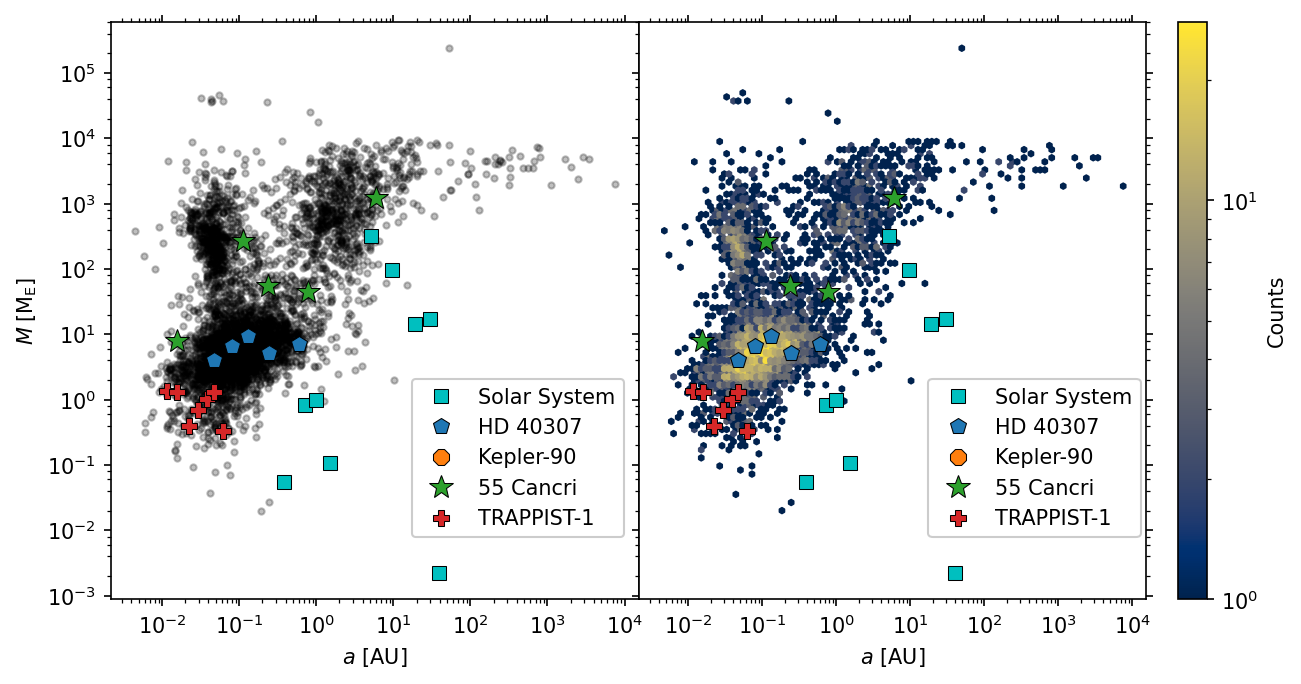

In [6]:
import matplotlib.ticker as ticks

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi=150, sharey=True,
                             gridspec_kw = {'width_ratios': [1, 1.2]})
fig.subplots_adjust(wspace=0)
ax1.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], 'k.', alpha=0.25)
ax1.set_xlabel(r'$a$ [AU]')
ax1.set_ylabel(r'$M\;[\mathrm{M}_{\mathrm{E}}]$')

hb = ax2.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['cividis'])
ax2.set_xlabel(r'$a$ [AU]')
fig.colorbar(hb, ax=ax2, label='Counts')

for ax in [ax1,ax2]:
    ax.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'cs',label='Solar System',
              mec='k',mew=0.5,ms=7)
    mks = ['p','8','*','P']
    for k,s in enumerate(['HD 40307','Kepler-90','55 Cancri','TRAPPIST-1']):
        inds = np.where(np.array(list(map(lambda s: s[:-2], exos['name']))) == s)
        ax.loglog(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],marker=mks[k],label=s,
                  ls='none',mec='k',mew=0.5,ms=12 if mks[k]=='*' else 8)
    ax.yaxis.set_major_locator(ticks.LogLocator(base=10,numticks=15))
    ax.yaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
    ax.yaxis.set_minor_formatter(ticks.NullFormatter())
    #ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
    ax.legend(bbox_to_anchor=(0.55,0.4),framealpha=1)
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)
# cbar_ax = fig.add_axes([0.77, 0.12, 0.02, 0.36])
# cb=fig.colorbar(hbin,cax=cbar_ax)
# cb.set_label('Bin Counts')

Is that one large group at lower masses and small orbital radii really just 1 population? How does the detection method affect what we see? These are questions you can visualize the answers to, but with 5250 data points, scatter plots with different colors and markers for each category aren't quite up to the task.

### Exercise 2.
Partial code is provided below that computes KDEs in mass for the 4 types of planets that are not "unknown".

Plot the KDEs as line contours on a grid of mass vs orbital radius, and make a proxy artist to label the contour sets. Experiment with the colors, fills, and levels to make the visual more readable. If prompted, replace "BLANK" with the appropriate content.

Take note of the fact that scipy.stats.gaussian_kde() currently does not support logspaced grids. The best way I've found to get around this is to convert the x and y values to their logs and then override the tick labels with something like `ax.set_[x|y]ticks(ax.get_xticks(), labels = '{}'.format(ax.get_xticks()))`. The main drawback is that there's no clear way to recover the minor ticks, so you just have to mark non-integer powers of 10. Inserting the correct powers of 10 with proper typesetting is left as part of the exercise.

This is probably the hardest prompt in the set. It's all downhill from here!

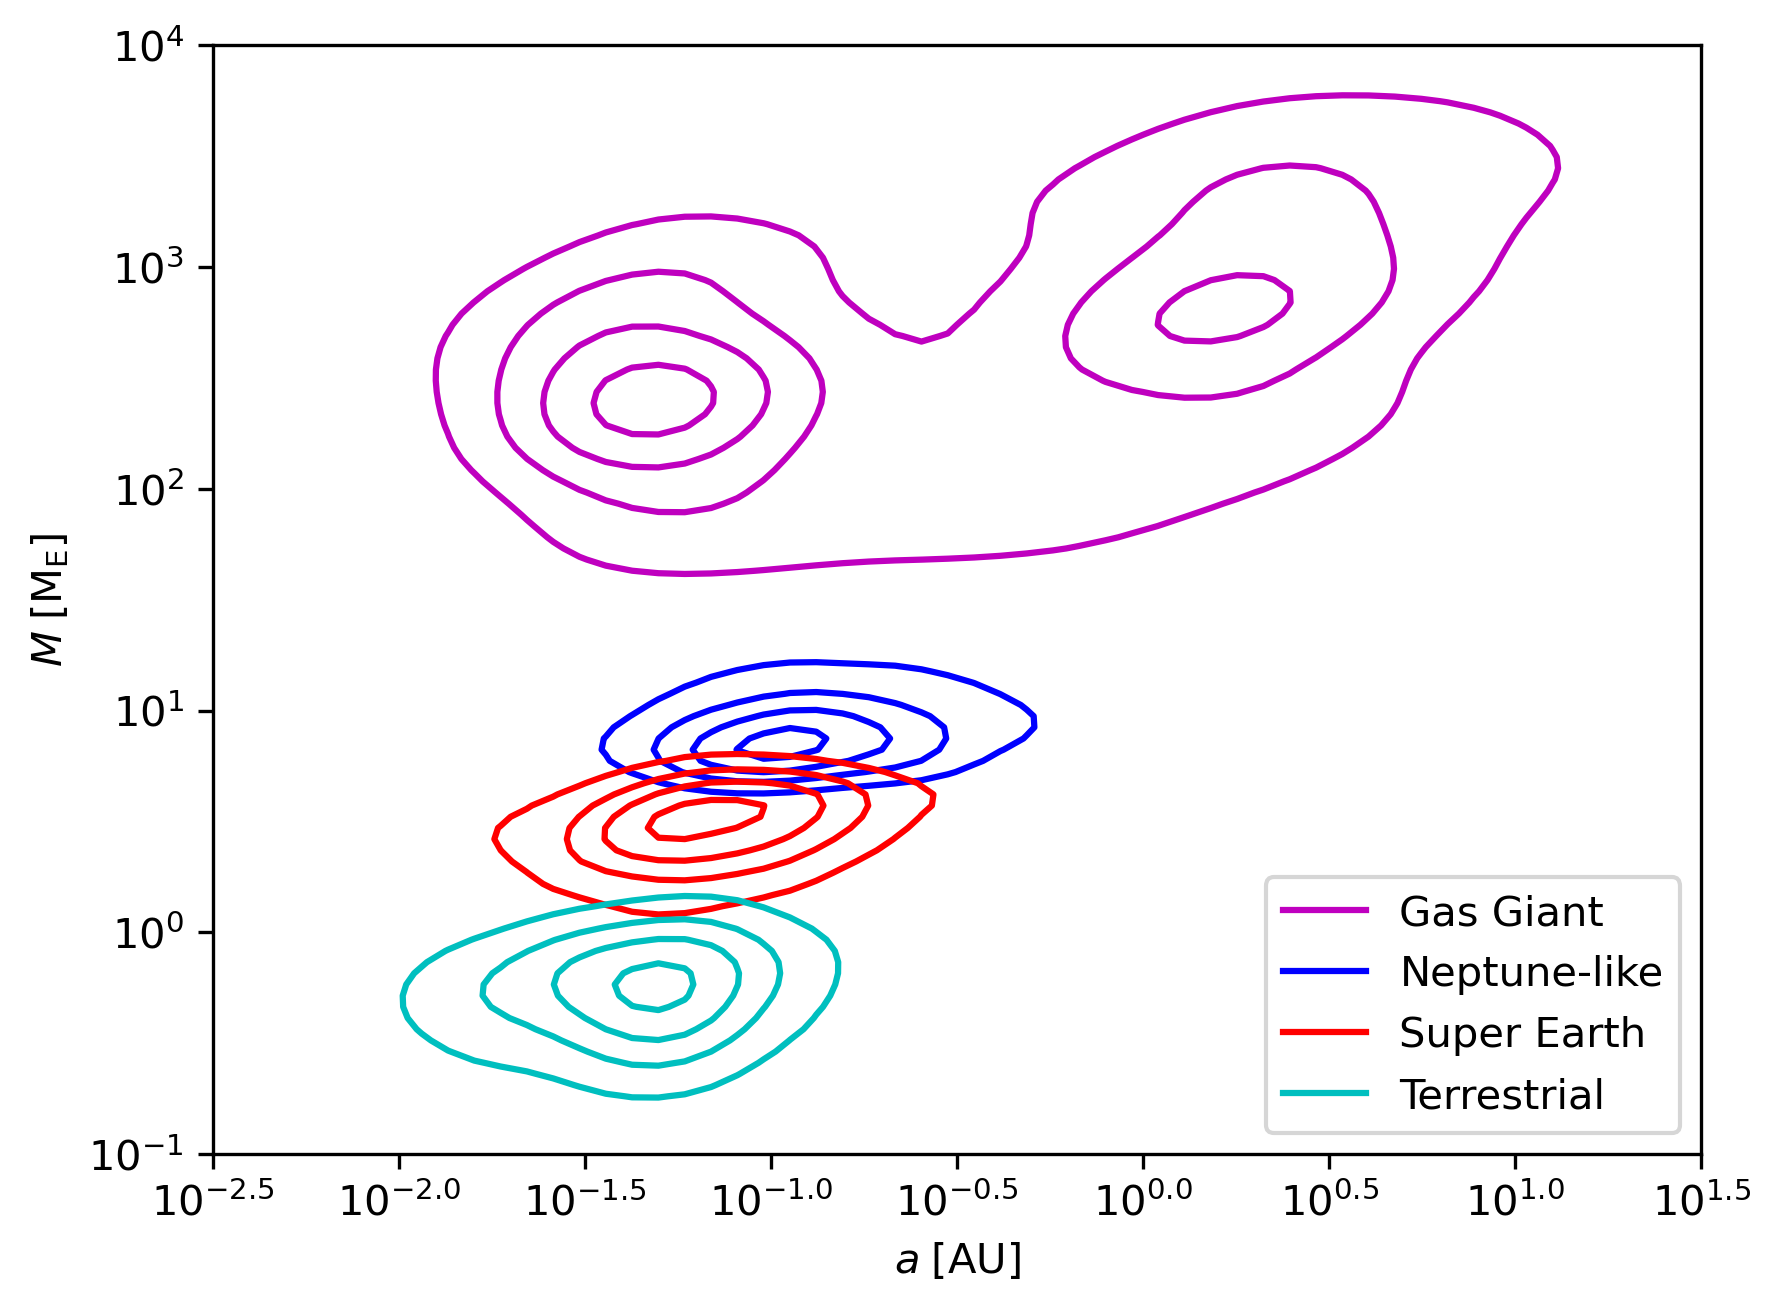

In [7]:
from itertools import cycle
from scipy.stats import gaussian_kde

fig,ax = plt.subplots(dpi=300)
X, Y = np.meshgrid(np.linspace(-3,4,100),np.linspace(-2,4,120))
pos = np.vstack([X.ravel(), Y.ravel()])

cc = cycle(['m', 'b', 'r', 'c'])
labels = sorted(set(exos['planet_type']))
lines = []

for k in labels:
    if not 'Unknown' in k:
        clr = next(cc)
        mask = np.isfinite(exos['mass_ME']) & np.isfinite(exos['orbital_radius_AU'])
        inds = np.where(np.logical_and(mask, exos['planet_type']==k))
        kernel = gaussian_kde((np.log10(exos['orbital_radius_AU'][inds]),
                               np.log10(exos['mass_ME'][inds])))
        Z = np.reshape(kernel(pos).T, X.shape)
        pcp = ax.contour(X,Y,Z, levels=4, colors=clr)
        lines.append( mpl.lines.Line2D([], [], color=clr, label=k) )
ax.set_xlim(left=-2.5,right=1.5)
ax.set_ylim(bottom=-1)
ax.set_xticks(ax.get_xticks(),
              labels=['$10^{{{:.1f}}}$'.format(lbl)
                      for lbl in ax.get_xticks()])
ax.set_yticks(ax.get_yticks(),
              labels=['$10^{{{:.0f}}}$'.format(lbl)
                      for lbl in ax.get_yticks()])
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\mathrm{E}}]$')
ax.legend(handles=lines, loc=4)

The above plot should look like the Terrestrial, Super-Earth, and Neptune-like contours are a closely-spaced chain of ovals increasing in mass and orbital radius, while the Gas Giants are significantly higher in mass overall and have a split distribution in orbital radius (it should look like an upended pair of shorts).

Now let's figure out how to show on a plot that exoplanet detection methods are sensitive to different ranges of mass and orbital radius/period (they're used interchangeably per Kepler's 3rd Law). For these it is insightful to use `orbital_period_yr` for the x-axes instead of `orbital_radius_au`, particularly if you know that for timing methods, an exoplanet has to be observed for at least 3 orbits to be confirmed.

This is what the plot would look like if we tried to color- and marker-code the first scatter plot by detection method, after merging all timing-related methods (and removing some axes improvements to avoid totally giving away exercise 1):

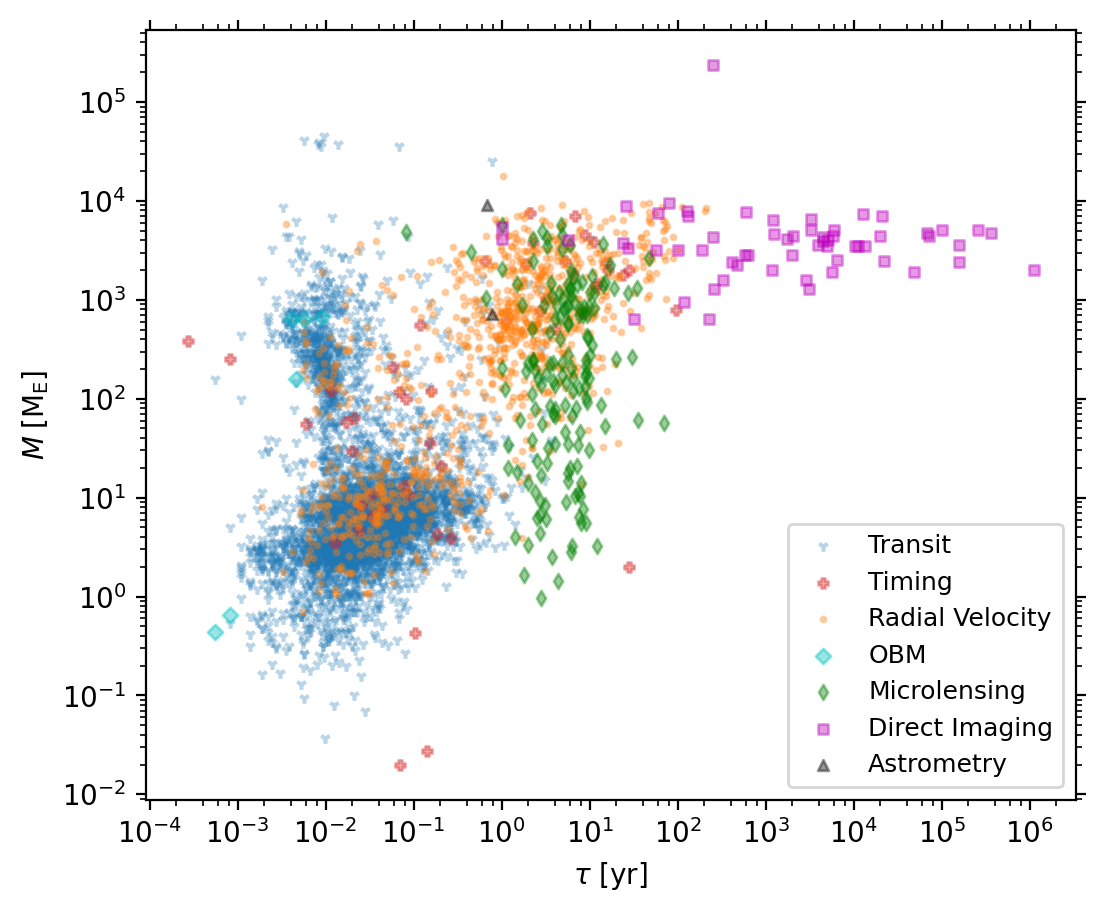

In [8]:
from itertools import cycle

fig,ax = plt.subplots(dpi=200, figsize=(6,5))

methds = ['Timing']
dummy,counts = np.unique(exos['detection_method'],return_counts=True)
for m in set(exos['detection_method']):
       if not 'Timing' in m and not 'Kinematics' in m:
            methds.append(m)
#it just so happens that the detection methods sort alphabetically
# are *almost* in decreasing order of use, so I'm going to start with 
# a cheat and see if it works
clcy2 = cycle(['tab:blue', 'tab:red','tab:orange', 'c','g', 'm', 'k'])
mkcy2 = cycle(['1','P','.','D','d','s', '^'])
for k in sorted(methds)[::-1]:
    if k == 'Timing':
        inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),
                                       np.char.find(exos['detection_method'],k)!=-1))
        # char find returns -1 if result is null
    else:
        inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),
                                       exos['detection_method']==k))
    
    ax.scatter(exos['orbital_period_yr'][inds],exos['mass_ME'][inds],
                c=next(clcy2), marker=next(mkcy2), 
                alpha=0.3 if k in ['Transit','Radial Velocity'] else 0.4,
                label=k.replace('Orbital Brightness Modulation',
                                'OBM').replace('Gravitational ',''), s=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\tau$ [yr]')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\mathrm{E}}]$')
ax.tick_params(axis='both', which='both', bottom=True,
                   top=True, left=True, right=True)
ax.xaxis.set_major_locator(ticks.LogLocator(base=10,numticks=15))
ax.xaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
ax.xaxis.set_minor_formatter(ticks.NullFormatter())
ax.legend(fontsize=9)

Enlightening, but very cluttered. Even after merging all the timing-adjacent methods (and omitting Disk Kinematics, since that only works for planets that have not finished forming) there are still too many categories for contours to improve much on this format.

In this case, it's probably best to treat the mass and orbit dependencies separately.

### Exercise 3-1.
One way to break things down is to realize that `planet_type` is a proxy for mass.

Make an annotated heat map with detection methods on one axis, planet type on the other, percentages of each planet type discovered with each detection method in the annotations, and a log-scaled colorbar of the percentages. Use the `imshow_heatmap.py` module included and [follow the matplotlib tutorial here (both helper functions are in imshow_heatmap.py, but I've editted them to handle masked arrays).](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) Note that to scale the colorbar, `norm='log'` can be passed to `imshow()` as a kwarg of `imshow_heatmap.heatmap()`.

Since this is not primarily an exercise in selecting and filtering data, I've provided most of the input arrays.

In [9]:
methds = ['Timing']
for m in set(exos['detection_method']):
       if not 'Timing' in m and not 'Kinematics' in m:
            methds.append(m)

ptypes, pcounts = np.unique(exos['planet_type'],return_counts=True)
pct_arr = np.zeros((len(ptypes), len(methds)))

for i,pt in enumerate(ptypes):
    for j,m in enumerate(methds):
        if m == 'Timing':
            pdmn = len(np.where(np.logical_and(exos['planet_type']==pt,
                    np.char.find(exos['detection_method'],m)!=-1))[0])
            # char find returns -1 if result is null
        else:
            pdmn = len(np.where(np.logical_and(exos['planet_type']==pt,
                    exos['detection_method']==m))[0])
        if pdmn > 0:
            pct_arr[i,j] = pdmn/pcounts[i]
print(pct_arr)

[[0.0190184  0.00245399 0.06932515 0.00122699 0.03680982 0.42392638
  0.44662577]
 [0.00328767 0.         0.0169863  0.         0.         0.86027397
  0.11945205]
 [0.00626959 0.         0.00564263 0.         0.         0.93793103
  0.05015674]
 [0.01538462 0.01025641 0.00512821 0.         0.         0.96410256
  0.00512821]
 [0.         0.6        0.         0.         0.4        0.
  0.        ]]


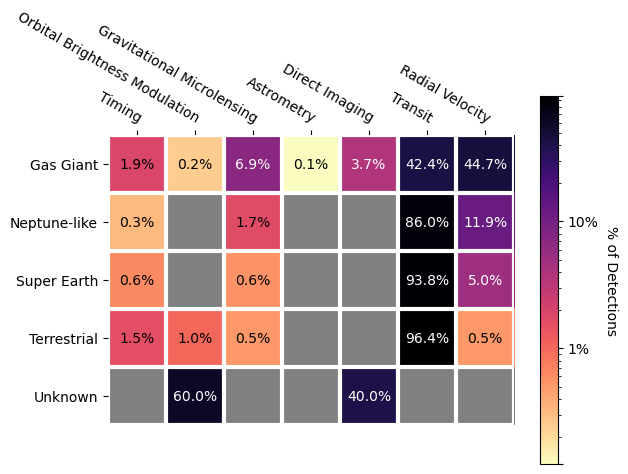

In [10]:
from imshow_heatmap import heatmap, annotate_heatmap
#this import format is normally bad practice, but
# that file only contains 2 modules & we'll use both
fig, ax = plt.subplots()
im, cbar = heatmap(pct_arr, ptypes, methds, ax=ax, norm='log',
                   cmap="magma_r", cbarlabel="% of Detections")
im.cmap.set_bad('gray') # I didn't expect you to know this, it just 
# helps me keep track of the rows & columns all the way across/down
# The default is for the cell borders & missing values to be white
texts = annotate_heatmap(im, valfmt="{x:.1%}")
cbar.set_ticks(ticks=[min(pct_arr[np.where(pct_arr>0)]),0.01,0.1,np.nanmax(pct_arr)],
               labels=['','1%','10%',''])
fig.tight_layout()
plt.show()

### Exercise 3-2.
Now let's look at the orbital period sensitivities of each method. We'll split the data into 6 endpoint-inclusive subsets by orbital period and label them as follows:

1. $\leq$1 day ($\leq$0.002738 yr) - "Hours"
2. 1-31 days (0.002738-0.08487 yr) - "Days"
3. 31-365.25 days (0.08487-1 yr) - "Months"
4. 1-10 years - "Years"
5. 10-100 years - "Decades"
6. $>$100 years - "Centuries +"
    
Taking guidance from [this Matplotlib demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py) (you do not have to define a function), plot a horizontally stacked bar chart showing the *precentages*, by time bracket, of exoplanets detected with each method. Use a different colormap than the demo. As with the previous prompt, I've provided the arrays so you can focus on the plotting.

In [52]:
tbins = np.array([0, 1/365.25, 31/365.25, 1., 10.,
                  100., np.nanmax(exos['orbital_period_yr'])])
tbin_lbls = ['Hours','Days','Months','Years','Decades','Centuries +']
fpm = np.zeros((len(methds),len(tbin_lbls)))
for i in range(1,len(tbins)):
    inds = np.where(np.logical_and(exos['orbital_period_yr'] > tbins[i-1],
                                   exos['orbital_period_yr'] <= tbins[i]))
    for j,m in enumerate(sorted(methds)):
        if m == 'Timing':
            mtot = len(np.where(np.char.find(exos['detection_method'],
                                             m)!=-1)[0])
            ppb = len(np.where(np.char.find(exos['detection_method'][inds],
                                             m)!=-1)[0])
            # char find returns -1 if result is null
        else:
            mtot = len(np.where(exos['detection_method']==m)[0])
            ppb = len(np.where(exos['detection_method'][inds]==m)[0])
        if mtot > 0:
            fpm[j,i-1] = ppb/mtot
for i,row in enumerate(fpm):
    print(sorted(methds)[i],': ', row,'\n')

Astrometry :  [0. 0. 1. 0. 0. 0.] 

Direct Imaging :  [0.         0.         0.06451613 0.01612903 0.11290323 0.80645161] 

Gravitational Microlensing :  [0.         0.00649351 0.03246753 0.82467532 0.13636364 0.        ] 

Orbital Brightness Modulation :  [0.55555556 0.44444444 0.         0.         0.         0.        ] 

Radial Velocity :  [0.00097371 0.26387537 0.24537488 0.3865628  0.10029211 0.00292113] 

Timing :  [0.04 0.32 0.2  0.26 0.18 0.  ] 

Transit :  [0.0278834  0.80659062 0.15969582 0.00583016 0.         0.        ] 



0.005821426203246929
0.20258421525054757
0.539787115167945
0.6011904590457888
0.29992622596033547
0.057149477809532306


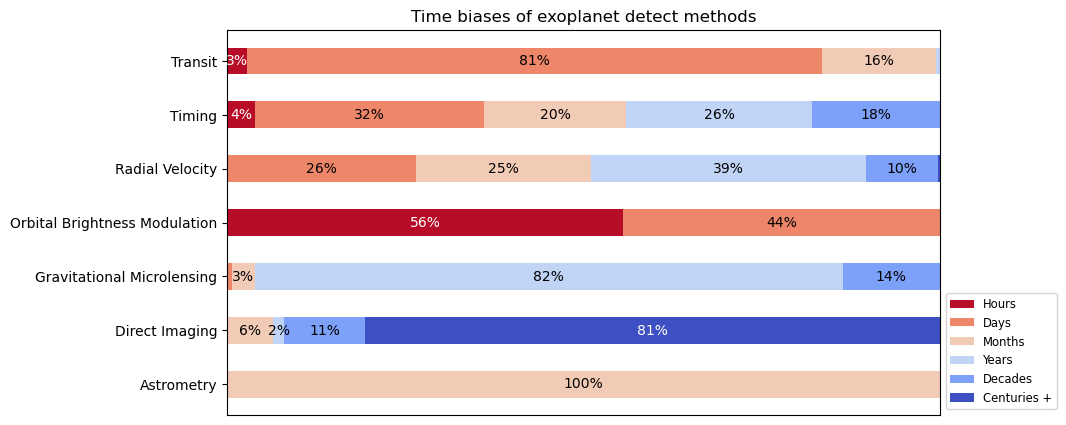

In [73]:
fig, ax = plt.subplots(figsize=(9.2, 5))
#x.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 1)
tbin_colors = plt.colormaps['coolwarm_r'](
        np.linspace(0.01, 0.99, len(tbin_lbls)))
fpm_cum = fpm.cumsum(axis=1)
for i, (colname, color) in enumerate(zip(tbin_lbls, tbin_colors)):
    widths = fpm[:, i]
    starts = fpm_cum[:,i] - widths
    rects = ax.barh(sorted(methds), widths, left=starts, height=0.5,
                    label=colname, color=color)
    blabels = len(methds)*['']
    for j,v in enumerate(rects.datavalues):
        if v*100 > 1.:
            blabels[j] = '{:.0%}'.format(v)
    r, g, b, _ = color
    print(r * g * b)
    text_color = 'white' if (r * g * b) < 0.2 else 'k'
    ax.bar_label(rects, labels=blabels,
                 label_type='center', color=text_color)
ax.legend(bbox_to_anchor=(1, 0),#ncols=len(tbin_lbls), 
          loc='lower left', fontsize='small')
ax.set_title('Time biases of exoplanet detection methods')
plt.show()

Now that you've seen the data above, how would you rearrange the bars for publication?

That's all for now, but feel free to play with the remaining data!